# Computer Vision Assignment 1 Part 1
---

Semester: **Fall 2022**

Due date: **September 29th 2022, 11.59PM EST.**

## Introduction
---

This assignment is an introduction to using PyTorch for training simple neural net models. Two different datasets will be used: 
- MNIST (handwritten digits)
- CIFAR-10 (32x32 resolution color images of 10 object classes)

## Instructions
---

You should perform this assignment using Google Colab. 
* Before starting, clone this assignment using `File > Save a copy in Drive`. 
* After you're done, go through the notebook and ensure that you have answered all questions.
* Finally, submit the ipynb `File > Download > Download .ipynb` on brightspace


## 1. Warmup [5%]
---

It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand. MNIST is a dataset of 70,000 grayscale hand-written digits (0 through 9).
60,000 of these are training images. 10,000 are a held out test set. On the other hand, CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes (airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). The train/test split is 50k/10k.

* (a) Display 10 random images from each class of MNIST
* (b) Do the same for each class of CIFAR-10

Use `matplotlib` and ipython notebook's visualization capabilities. See [this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) for hints on how to achieve this.

## 2. Training a Single Layer Network on MNIST [10%]
---

* (a) Start by running the training on MNIST.
By default if you run this notebook successfully, it will train on MNIST.

This will initialize a single layer model and train it on the 60,000 MNIST training images for 1 epoch (passes through the training data). The loss function ([cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy)) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`. The default values for the learning rate, batch size and number of epochs are given in the `options` cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. Note the decrease in training loss and corresponding decrease in validation errors.

* (b): Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )

* (c): Reduce the number of training examples to just 50. (Hint: limit the iterator in the `train` function) and train the model until the loss converges. Explain what is happening to the model.

## 3. Training a Multi-Layer Network on MNIST [10%]
---

* (a) Add an extra layer with 1000 hidden units and a `tanh` nonlinearity. (Hint: modify the `Net` class). Train the model for 10 epochs.
* (b) Now set the learning rate to 10 and observe what happens during training. Give a brief explanation of your observations

## 4. Training a Convolutional Network on CIFAR [25%]
---

To change over to the CIFAR-10 dataset, change the `options` cell's `dataset` variable to `'cifar10'`.

- (a) Create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling (non-overlapping).
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

* (b) Train it for 20 epochs on the CIFAR-10 training set. Show an image of the first layer filters.

* (c) Give a breakdown of the parameters within the above model, and the overall number.

Hints: [Follow the first PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html) or look at the [MNIST example](https://github.com/pytorch/examples/tree/master/mnist). Also, you may speed up training if you use a GPU runtime (`RunTime > Change Runtime Type > GPU`).

In [ ]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [ ]:
# Options
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01        # learning rate

In [ ]:
# Data Loading
# This cell might take some time when you run it for the first time, 
# because it will download the datasets from the internet
def get_set(dataset):
  if dataset == 'mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    trainset = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)
  elif dataset == 'cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)
  
  train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
  test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)
  return trainset,testset,train_loader,test_loader


1. Warmup

(a) Display 10 random images from each class of MNIST



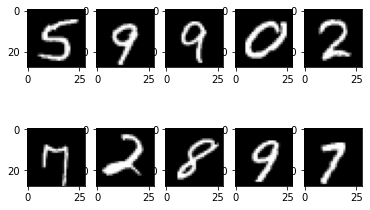

In [ ]:
#Display 10 random images from each class of MNIST
import matplotlib.pyplot as plt
import random
import numpy as np

dataset = 'mnist' # options: 'mnist' | 'cifar10'
trainset,testset,train_loader,test_loader = get_set(dataset)

#list of 10 random different images in MNIST
random_mnist = random.sample(range(0,10000),10)

plt.figure()
for i in range(0,10):
  plt.subplot(2,5,i+1)
  image_location = random_mnist[i]
  images,label = trainset[image_location]
  images = images.reshape((28,28))
  plt.imshow(images,cmap="gray")
plt.show()


(b) Do the same for each class of CIFAR-10

Files already downloaded and verified
Files already downloaded and verified


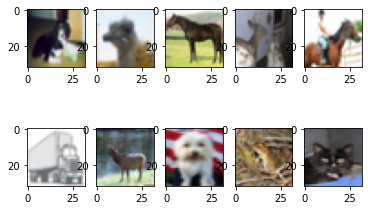

In [ ]:
#Display 10 random images from each class of CIFAR-10
import matplotlib.pyplot as plt
import random
import numpy as np

dataset = 'cifar10' # options: 'mnist' | 'cifar10'
trainset,testset,train_loader,test_loader = get_set(dataset)

#list of 10 random different images in CIFAR-10
random_cifar = random.sample(range(0,10000),10)

plt.figure()
for i in range(0,10):
  plt.subplot(2,5,i+1)
  image_location = random_cifar[i]
  images,label = trainset[image_location]
  images = images/ 2 + 0.5
  plt.imshow(np.transpose(images,(1,2,0)))
plt.show()

2. Training a Single Layer Network on MNIST

In [ ]:
## network and optimizer

def which_dataset(dataset):
  num_outputs = 10
  if dataset == 'mnist':
    num_inputs = 784
  elif dataset == 'cifar10':
    num_inputs = 3072
  return num_outputs,num_inputs

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output


In [ ]:
def train(network,epoch,train_loader):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(network,test_loader):
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = network(data)
        test_loss += F.cross_entropy(output, target, reduction='sum').item() # sum up batch loss
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss
    


(a) Start by running the training on MNIST. By default if you run this notebook successfully, it will train on MNIST.
This will initialize a single layer model and train it on the 60,000 MNIST training images for 1 epoch (passes through the training data). The loss function (cross_entropy) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given target. The default values for the learning rate, batch size and number of epochs are given in the options cell of this notebook. Unless otherwise specified, use the default values throughout this assignment. Note the decrease in training loss and corresponding decrease in validation errors.

In [ ]:
dataset = 'mnist' # options: 'mnist' | 'cifar10'
trainset,testset,train_loader,test_loader = get_set(dataset)
num_outputs,num_inputs = which_dataset(dataset)
network = Net(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)
for epoch in range(0,20):
  train(network,epoch,train_loader)
  test(network,test_loader)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.415843
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.503727
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.649232
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.586170
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.443432
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.260542
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.279819
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.417355
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.519077
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.288186

Test set: Average loss: 0.3352, Accuracy: 9068/10000 (91%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.321813
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.187373
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.232060
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.247957
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.376854
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.312594
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.408566
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.236933
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.479350
T

(b) Add code to plot out the network weights as images (one for each output, of size 28 by 28) after the last epoch. (Hint threads: #1 #2)

In [ ]:
w,b = list(network.parameters())

In [ ]:
w.shape

torch.Size([10, 784])

In [ ]:
weights = w.reshape([10,28,28]).detach().numpy()

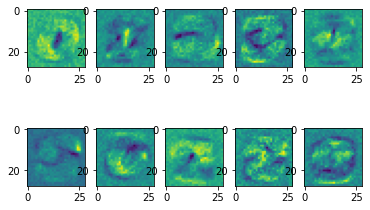

In [ ]:
plt.figure()
for j in range(0,10):
  plt.subplot(2,5,j+1)
  plt.imshow(weights[j])
plt.show()


(c) Reduce the number of training examples to just 50. (Hint: limit the iterator in the train function) and train the model until the loss converges. Explain what is happening to the model.

In [29]:
def limited_set(limited_dataset):
  if limited_dataset == 'limited_mnist':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    fulltrain = datasets.MNIST(root='.', train=True, download=True, transform=data_transform)
    trainset = data_utils.Subset(fulltrain,indices=torch.arange(50))
    testset = datasets.MNIST(root='.', train=False, download=True, transform=data_transform)
  elif dataset == 'limited_cifar10':
    data_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
    fulltrain = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
    trainset = data_utils.Subset(fulltrain,indices=torch.arange(50))
    testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)
  
  train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
  test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)
  return trainset,testset,train_loader,test_loader

In [33]:
import torch.utils.data as data_utils
trainset,testset,train_loader,test_loader = limited_set('limited_mnist')
#check the number of training examples
print(len(trainset))
num_outputs,num_inputs = which_dataset(dataset)
network = Net(num_inputs, num_outputs)

50


In [34]:
last_loss = 100
current_loss = 0
epoch = 0
patience = 0
while epoch >=0 :
  if patience == 3:
    break
  else:
    train(network,epoch,train_loader)
    current_loss = test(network,test_loader)
    if abs(current_loss - last_loss) <= 0.05:
      patience += 1
    else:
      patience = 0
  last_loss = current_loss
  epoch += 1
  
  


Train Epoch: 0 [0/50 (0%)]	Loss: 2.587033

Test set: Average loss: 2.4943, Accuracy: 641/10000 (6%)

Train Epoch: 1 [0/50 (0%)]	Loss: 2.587033

Test set: Average loss: 2.4943, Accuracy: 641/10000 (6%)

Train Epoch: 2 [0/50 (0%)]	Loss: 2.587033

Test set: Average loss: 2.4943, Accuracy: 641/10000 (6%)

Train Epoch: 3 [0/50 (0%)]	Loss: 2.587034

Test set: Average loss: 2.4943, Accuracy: 641/10000 (6%)



According to the result, we can see that the loss convergence after train for very short times. And it has very low accuracy. I think the reason is that the data set is too small.

3. Training a Multi-Layer Network on MNIST

(a) Add an extra layer with 1000 hidden units and a tanh nonlinearity. (Hint: modify the Net class). Train the model for 10 epochs.

In [ ]:
class MLN(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(MLN, self).__init__()
        self.fc1 = nn.Linear(num_inputs, 1000)
        self.fc2 = nn.Linear(1000,num_outputs)

    def forward(self, input):
        input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        output = F.tanh(self.fc1(input))
        output = self.fc2(output)
        return output

In [ ]:
dataset = 'mnist' # options: 'mnist' | 'cifar10'
num_outputs,num_inputs = which_dataset(dataset)
network = MLN(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=lr)
trainset,testset,train_loader,test_loader = get_set(dataset)
for epoch in range(0,10):
  train(network,epoch,train_loader)
  test(network,test_loader)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.365192
Train Epoch: 0 [6400/60000 (11%)]	Loss: 0.828830
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.487574
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.497191
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.389951
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.470171
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.205364
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.234460
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.391886
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.437927

Test set: Average loss: 0.3235, Accuracy: 9072/10000 (91%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.276076
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.433726
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.240677
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.407704
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.328454
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.464904
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.395417
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.489488
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.275561
T

(b) Now set the learning rate to 10 and observe what happens during training. Give a brief explanation of your observations

In [ ]:
dataset = 'mnist' # options: 'mnist' | 'cifar10'
num_outputs,num_inputs = which_dataset(dataset)
network = MLN(num_inputs, num_outputs)
optimizer = optim.SGD(network.parameters(), lr=10)
trainset,testset,train_loader,test_loader = get_set(dataset)
for epoch in range(0,10):
  train(network,epoch,train_loader)
  test(network,test_loader)

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.367329
Train Epoch: 0 [6400/60000 (11%)]	Loss: 3241.341797
Train Epoch: 0 [12800/60000 (21%)]	Loss: 1030.205200
Train Epoch: 0 [19200/60000 (32%)]	Loss: 663.456055
Train Epoch: 0 [25600/60000 (43%)]	Loss: 533.727539
Train Epoch: 0 [32000/60000 (53%)]	Loss: 685.878662
Train Epoch: 0 [38400/60000 (64%)]	Loss: 462.033539
Train Epoch: 0 [44800/60000 (75%)]	Loss: 389.413300
Train Epoch: 0 [51200/60000 (85%)]	Loss: 629.114136
Train Epoch: 0 [57600/60000 (96%)]	Loss: 867.440186

Test set: Average loss: 146.3613, Accuracy: 6956/10000 (70%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 192.206757
Train Epoch: 1 [6400/60000 (11%)]	Loss: 590.136047
Train Epoch: 1 [12800/60000 (21%)]	Loss: 481.049744
Train Epoch: 1 [19200/60000 (32%)]	Loss: 211.676926
Train Epoch: 1 [25600/60000 (43%)]	Loss: 320.284424
Train Epoch: 1 [32000/60000 (53%)]	Loss: 231.070541
Train Epoch: 1 [38400/60000 (64%)]	Loss: 216.554306
Train Epoch: 1 [44800/60000 (75%)]	Loss: 703.644165
Train Epoch: 

The loss change dramatically. This is because the large learning rate will lead to the failure to converge.

4. Training a Convolutional Network on CIFAR 

To change over to the CIFAR-10 dataset, change the options cell's dataset variable to 'cifar10'.

(a) Create a convolutional network with the following architecture:

* Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.

* 2 by 2 max pooling (non-overlapping).

* Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.

* 2 by 2 max pooling (non-overlapping).

* Flatten to vector.

* Linear layer with 64 hidden units + Tanh nonlinearity.

* Linear layer to 10 output units.

In [ ]:
class CN(nn.Module):
    def __init__(self):
        super(CN, self).__init__()
        self.conv1 = nn.Conv2d(3,16,(5,5))
        self.conv2 = nn.Conv2d(16,128,(5,5))
        self.fc1 = nn.Linear(3200,64)
        self.fc2 = nn.Linear(64,10)
        
    def forward(self, x):
        #input = input.view(-1, num_inputs) # reshape input to batch x num_inputs
        x = F.max_pool2d(F.tanh(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.tanh(self.conv2(x)),(2,2))
        x = torch.flatten(x, 1)
        x = F.tanh(self.fc1(x))
        output = self.fc2(x)
        return output

(b) Train it for 20 epochs on the CIFAR-10 training set. Show an image of the first layer filters.

In [ ]:
dataset = 'cifar10' # options: 'mnist' | 'cifar10'
num_outputs,num_inputs = which_dataset(dataset)
network = CN()
optimizer = optim.SGD(network.parameters(), lr=lr)
trainset,testset,train_loader,test_loader = get_set(dataset)
for epoch in range(0,20):
  train(network,epoch,train_loader)
  test(network,test_loader)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 0 [0/50000 (0%)]	Loss: 2.308172
Train Epoch: 0 [6400/50000 (13%)]	Loss: 2.070567
Train Epoch: 0 [12800/50000 (26%)]	Loss: 2.033651
Train Epoch: 0 [19200/50000 (38%)]	Loss: 2.179412
Train Epoch: 0 [25600/50000 (51%)]	Loss: 1.924083
Train Epoch: 0 [32000/50000 (64%)]	Loss: 1.758680
Train Epoch: 0 [38400/50000 (77%)]	Loss: 1.808446
Train Epoch: 0 [44800/50000 (90%)]	Loss: 1.829091

Test set: Average loss: 1.7911, Accuracy: 3818/10000 (38%)

Train Epoch: 1 [0/50000 (0%)]	Loss: 1.914997
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.773212
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.739175
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.742048
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.686075
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.700479
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.557264
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.457295

Test set: Average loss: 1.6054, Accuracy: 4301/10000 (43%)

Train Epoch: 2

In [ ]:
weights = network.conv1.weight

In [ ]:
weights.shape

torch.Size([16, 3, 5, 5])

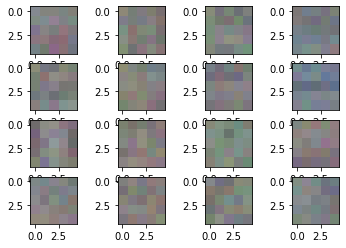

In [ ]:
plt.figure()
for j in range(0,16):
  plt.subplot(4,4,j+1)
  img = weights[j].permute(1,2,0)
  img = img / 2 + 0.5
  plt.imshow(img.detach())
plt.show()

(c) Give a breakdown of the parameters within the above model, and the overall number.

In [ ]:
from torchsummary import summary
summary(network,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]           1,216
            Conv2d-2          [-1, 128, 10, 10]          51,328
            Linear-3                   [-1, 64]         204,864
            Linear-4                   [-1, 10]             650
Total params: 258,058
Trainable params: 258,058
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.19
Params size (MB): 0.98
Estimated Total Size (MB): 1.19
----------------------------------------------------------------
